# Preliminaries

In [2]:
import sys
import os

# Set the PYTHONPATH to the project root
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [3]:
from src.DFA.ParityDFA import ParityDFA
from src.bilinear.config import TrainConfig
from src.bilinear.train_bilinear import train_bilinear
from src.bilinear.inference_bilinear import inference_bilinear
from src.bilinear.bilinear_function import BilinearFunction
from src.utils.visualizations import plot_loss, plot_losses, visualize_metrics, metrics_by_length

import torch
import torch.nn as nn

# Train

In [4]:
alphabet = ParityDFA.alphabet + ['<', '>']
states = ParityDFA.states + ['<START>', '<ACCEPT>', '<REJECT>']

model = BilinearFunction(alphabet, states)
config = TrainConfig(DFA=ParityDFA, 
                        criterion = nn.CrossEntropyLoss(),
                        num_epochs = 10,
                        lr = 0.2,
                        example_length = 10,
                        l1_penalty = 0.01
                        )
optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)

train_loss, train_ce_loss, train_l1_loss = train_bilinear(model, optimizer, config)

/Users/sarahbentley/dfa_transformer/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1/10, Avg Training Loss: 1.4571550140778224
Epoch 2/10, Avg Training Loss: 0.7989936321973801
Epoch 3/10, Avg Training Loss: 0.6148972610632578
Epoch 4/10, Avg Training Loss: 0.5694838886459669
Epoch 5/10, Avg Training Loss: 0.5312338049213091
Epoch 6/10, Avg Training Loss: 0.482691985865434
Epoch 7/10, Avg Training Loss: 0.5445363720258077
Epoch 8/10, Avg Training Loss: 0.41931897898515064
Epoch 9/10, Avg Training Loss: 0.4487503444155057
Epoch 10/10, Avg Training Loss: 0.38651423156261444


# Evaluation

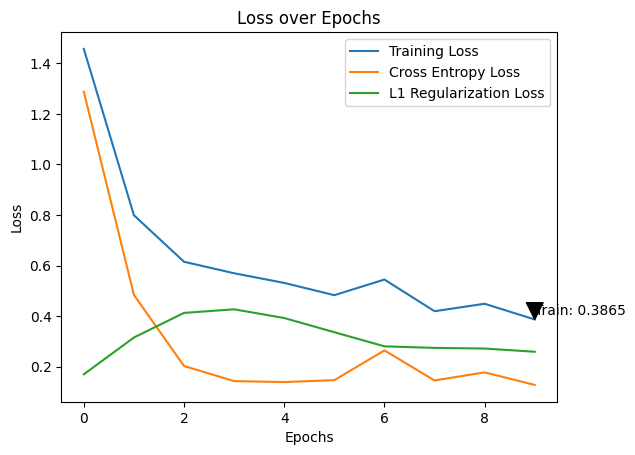

In [5]:
plot_losses(train_loss, train_ce_loss, train_l1_loss)

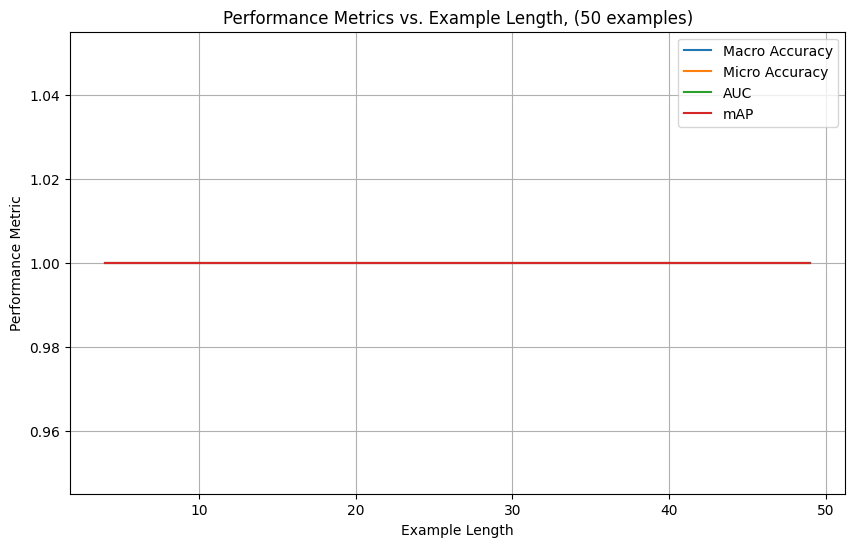

In [6]:
metrics_by_length(model, inference_bilinear, ParityDFA, example_lengths = [i for i in range(4, 50)], num_examples=50)

<Figure size 1000x500 with 0 Axes>

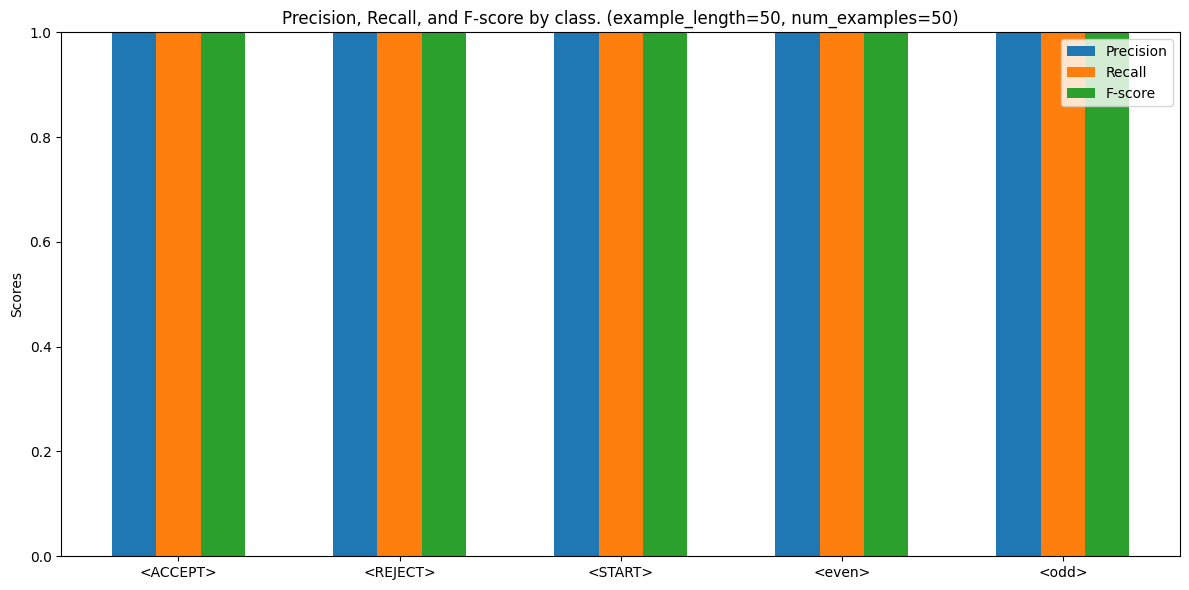

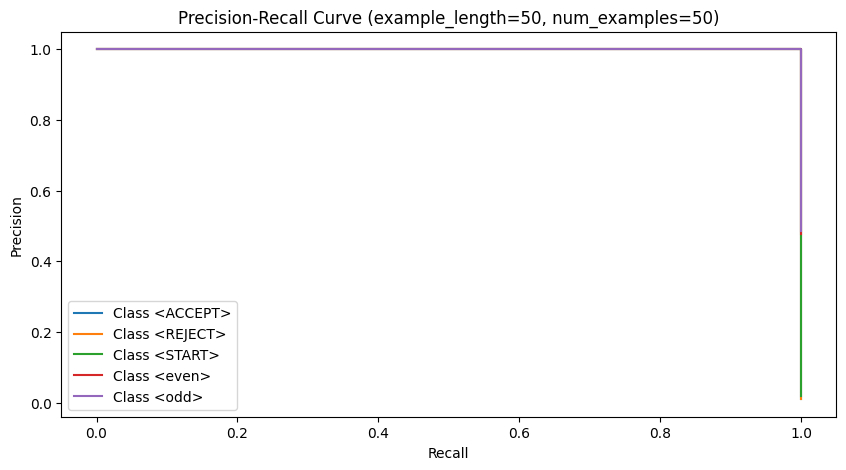

In [7]:
example_length=50
num_examples=50
DFA_outputs, learner_outputs = inference_bilinear(model, ParityDFA, example_length, num_examples)
visualize_metrics(DFA_outputs, learner_outputs, example_length, num_examples)